# Class Session 2 
## Comparing running times for enumerating neighbors of all vertices in a graph (with different graph data structures)

In this notebook we will measure the running time for enumerating the neighbor vertices for three different data structures for representing an undirected graph:
- adjacency matrix
- adjacency list
- edge list

Let's assume that each vertex is labeled with a unique integer number.  So if there are N vertices, the vertices are labeled 0, 2, 3, 4, ..., N-1.

First, we will import all of the Python modules that we will need for this exercise:
note how we assign a short name, "np" to the numpy module. This will save typing. 

In [1]:
import numpy as np
import igraph
import timeit
import itertools

Now, define a function that returns the index numbers of the neighbors of a vertex i, when the 
graph is stored in adjacency matrix format.  So your function will accept as an input a NxN numpy matrix. The function should return a list (of index numbers of the neighbors).

In [2]:
def enumerate_matrix(gmat, i):


Define a function that enumerates the neighbors of a vertex i, when the 
graph is stored in adjacency list format (a list of lists). The function should return a list (of index numbers of the neighbors).

In [3]:
def enumerate_adj_list(adj_list, i):


Define a function that enumerates the neighbors of a vertex i, when the 
graph is stored in edge-list format (a numpy array of length-two-lists); use `numpy.where` and `numpy.unique`. The function should return a list (of index numbers of the neighbors).

In [4]:
def enumerate_edge_list(edge_list, i):
    inds1 = 
    elems1 = 
    inds2 = 
    elems2 = 
    return np.unique(elems1 + elems2).tolist()

In this notebook, we are going to create some random networks. We'll use the Barabasi-Albert method, which has two parameters, *n* and *m* (where *n* > *m*). (For more information on the Barabasi-Albert model, see http://barabasi.com/f/622.pdf). In `igraph`, the `igraph.Graph.Barabasi` method will generate a single connected undirected graph with *n* vertices and where the total number *E* of edges is:

    E = nm - (m^2 / 2) - m/2
    
Let's plot a Barabasi-Albert graph generated using *n*=5 and *m*=3:

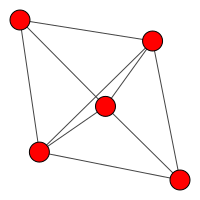

Now we need to write a simulation funtion that generates random graphs and enumerates all neighbors of each vertex in the graph (while computing running time), for each of three different graph data structures (adjacency matrix, adjacency list, and edge list). The function's sole argument "n" is the number of vertices.
It returns a length-three list containing the average running time for enumerating the neighbor vertices of a vertex in the graph. 

In [5]:
def do_sim_ms(n):

    retlist = []
    
    nrep = 10
    nsubrep = 10
    
    # this is (sort of) a Python way of doing the R function "replicate":
    for _ in itertools.repeat(None, nrep):
        
        # make a random undirected graph with n=n and m=5:
        g = 
        
        # get the graph in three different representations
        g_matrix =       # g_matrix should be a numpy matrix
        g_adj_list =     # g_adj_list should be a list of lists
        g_edge_list =    # g_edge_list should be a numpy array
    
        start_time = timeit.default_timer()
    
        # repeat nsubrep times
            # iterate over all vertices letting i be the loop variable
                # call enumerate_matrix for vertex i
  
        matrix_elapsed = timeit.default_timer() - start_time
        
        start_time = timeit.default_timer()
        
        # repeat nsubrep times
            # iterate over all vertices letting i be the loop variable
                # call enumerate_adj_list for vertex i     
        
        adjlist_elapsed = timeit.default_timer() - start_time
        
        start_time = timeit.default_timer()
        
        # repeat nsubrep times
            # iterate over all vertices letting i be the loop variable
                # call enumerate_edge_list for vertex i      
        
        edgelist_elapsed = timeit.default_timer() - start_time
        
        retlist.append([matrix_elapsed, adjlist_elapsed, edgelist_elapsed])

        resarray = 1000 * np.mean(np.array(retlist), axis=0)/n

        resdict = {'adjacency matrix': resarray[0],
                   'adjacency list': resarray[1],
                   'edge list': resarray[2]}
        # average over replicates and then
        # divide by n so that the running time results are on a per-vertex basis
    return resdict

A simulation with 1000 vertices clearly shows that adjacency list is fastest:

{'adjacency matrix': 0.15857457559905014,
 'adjacency list': 0.0009786342969164252,
 'edge list': 0.39372085049981254}

Now let's quadruple "n". We see the expected behavior, with the running time for the adjacency-matrix and edge-list formats going up when we increase "n", but there is hardly any change in the running time for the graph stored in adjacency list format:

{'adjacency matrix': 0.3456842259489349,
 'adjacency list': 0.0010989339258230756,
 'edge list': 0.7524919939503889}